# Regression
Regression is a form of supervised learning where a model predicts quantitative data (or in some cases ordinal categorical data).  In these models we are mapping the change of input features to a change in the output feature.  If this sounds familiar, we already did this back in DVM with the regression line!  In this graph we can see that there is some correlation between the input (x axis) and the output (y axis), so to make a prediction we would just use the regression line to see the esimated y value.  We will discuss this more later, but look at how far the training samples are from the regression line.

* y (output) = X (input data) B(coefficients) + E(noise)

<img src="images\regression00.png" width=400/>

## Regression EDA - Output Feature
We typically do not want to tranform the output feature, however performance can be improved when it is normally distributed with few outliers.  If performance is poor you can try removing any samples beyond the 3rd deviation, recall the 68-95-99 rule.  Remember that outliers might be important, be sure to examine them before you remove them permanently. Also note that below I am using the mean and standard deviation to detect outliers, these calculations are sensitive to extreme values, it might make more sense to use the median or even quartiles to detect outliers.

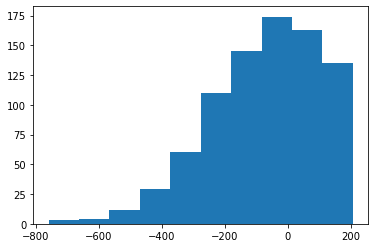

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

X, y = make_regression(n_samples=1000, random_state=300)

# remove only from right side of graph
std_dev, mean = np.std(y), np.mean(y)
y = y[y < (mean + std_dev*1)]

plt.hist(y)
plt.show()

## Linear
The simplest regression estimator, LinearRegression, fits a linear model to the data using the OLS (ordinary least squares) algorithm.  OLS works by minimizing the sum of the squared differences between the input and output data.  Basically we are saying any distance between training samples and the regression line is error, if we minimize this then the line generated should be close to the underlying function.  This model is very straight forward and does not have many options for tuning.

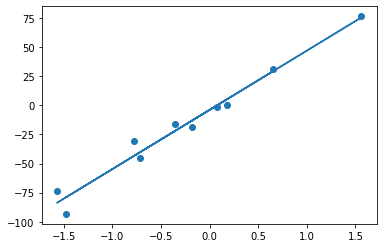

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=10, n_features=1, noise=10)

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.show()

We can look at the estimator's coefficients, this tells us the relationship between each input and the output. The way to analyze this value is that for every change of 5.7 for this input, the output changes by 1. These values should match roughly to the importance of each feature, if the coefficient is 0.0 then that means it does not affect the output at all.

In [4]:
print(model.coef_)

[79.64243272]


## Ridge
Ridge implements OLS just like linear regression, however this model applies a penalty based on the size of the coefficients so that none of them grow too large (this type of shrinkage is known as L2).  This makes outliers affect the model less since there will be a larger penalty applied to it, thusly the coefficient for that feature does not grow as large.  The alpha parameter controls how strong the penalty is, the lower this number is the more similar it becomes to linear regression.

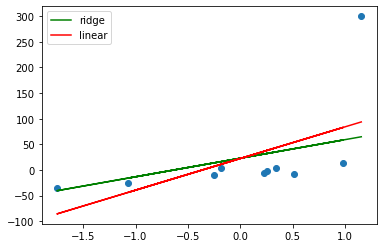

In [8]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10, n_features=1, noise=10, random_state=100)
y[-1] = 300 # create outlier

rregr = linear_model.Ridge(alpha=5)
lregr = linear_model.LinearRegression()
rregr.fit(X, y)
lregr.fit(X, y)

plt.scatter(X, y)
plt.plot(X, rregr.predict(X), color='g')
plt.plot(X, lregr.predict(X), color='r')
plt.legend(['ridge', 'linear'])
plt.show()

## SGD (Stochastic Gradient Descent)
SGD estimators work estimating loss one sample at a time, each time the loss is updated the learning rate is adjusted.  Imagine your are standing on a hill and you want to get to the bottom, you would take a look around you and see where the biggest drop is and then take one step, then you repeat this process until you're at the bottom, this is how SGD works.  Gradient descent is very good at finding the local minimum, but not very good at finding the maximum (this is a difficult problem to solve).  This model is very sensitive to unscaled data and takes a lot of tuning to work well.

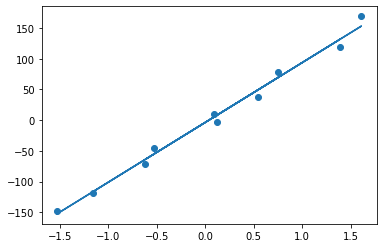

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=10, n_features=1, noise=10)

model = SGDRegressor()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.show()

## Lasso
Lasso is similar to ridge with respect to how it applies a penalty to coefficients, however instead of applying a penalty to each feature individually the coefficients are compared to each other (this is known as L1 shrinkage).  If a feature has a small coefficient, then it is not likely to be a good predictor (as X changes, no discernible change in y occurs), lasso will simply make these smaller coefficients 0. This leads to what is known as a sparse solution, essentially a form of feature selection. Again the *alpha* parameter controls the level of penalization.

In [8]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10, n_features=2, noise=10, random_state=300)
X[:,0] = np.random.rand(len(X))

model = Lasso(alpha=5)
model.fit(X, y)

print(model.coef_)

[ 0.         43.85774924]


## Polynomials Models
All of the models we've looked at are great if the relationship between your input / output is a straight line, what happens if the relationsip is a curve?  To fit a non linear relationship a polynomial model must be used, polynomial regression is actually a special case of linear regression where we create polynomial combinations of the input data using the following formula.

* input features [a, b] = [1, a, b, a^2, ab, b^2]

Since this generates a polynomial we can then map the new nonlinear change to the output.  We can also change the degree of the polynomial for more complex shapes, we need to be careful as the number of features this creates can get large very quickly.

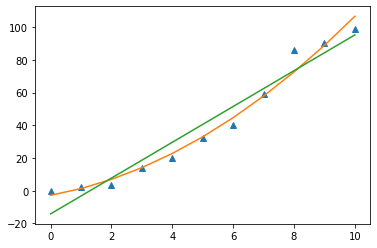

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = np.array([0,1,2,3,4,5,6,7,8,9,10]).reshape((11,1))
y = np.array([0,2.2,3.5,14,20,32,40,59,86,90,99]).reshape((11,1))

poly = PolynomialFeatures(2)
X_ = poly.fit_transform(X)

non_linear = LinearRegression()
linear = LinearRegression()

non_linear.fit(X_, y)
linear.fit(X, y)

plt.plot(X,y,'^')
plt.plot(X, non_linear.predict(X_))
plt.plot(X, linear.predict(X))
plt.show()

If we look at the terms created then what is actually happening might make more sense.  We get a constant, the original term, and the new squared term.  Looking at the coefficients we can see the constant is ignored, the model is using a combination of the 2nd and 3rd term to generate predictions.

In [21]:
print(non_linear.coef_)
print(X_)

[[0.         3.35881119 0.75839161]]
[[  1.   0.   0.]
 [  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


### Feature Interaction
Sometimes features do not affect output independently, they can have an intertwined affect. Lets say we have the inputs 'n_bathrooms', 'n_bedrooms' and we are trying to model their relationship to output features 'cost'.  A house with many bathrooms and bedrooms would probably cost more than a house with less.  Now consider a house with 10 bathrooms and 0 bedrooms, despite the high number of bathrooms it would probably not be worth as much as a place with a smaller, even amount of rooms.  If this is the case, then it could indicate a feature interaction. PolynomialFeatures does this for us (see the ab term above), there is even a flag to make it so that it only does feature interactions (interaction_only).

# Workflow
There is not a strict blueprint for how to complete a machine learning problem, with varying data the workflow for each problem will be drastically different.  This general workflow can help, but shouldn't be strictly followed.  As the course progresses we will uncover more and transition from naive approaches to more robust.

<img src="images\ml_workflow02.png" width=800/>

# OK
There are many more regression algorithms in sklearn, each of them are best under specific circumstances.  Once you have identified that you are doing a regression problem you can test different models to see which one scores better and use that one for your predictions, an important part of this is utilizing metrics and visualizations to get a good idea of what is happening.  There are many things that we are being naive about for now, through the class we employ more sophisticated techniques.